In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Red Wine Data
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。

讀取資料，並印出資料前五筆觀察值。

In [4]:
df = pd.read_excel('pca_data/wine.xlsx')

In [5]:
df = pd.read_excel('pca_data/wine.xlsx')
print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<a id="data1Q1"></a>
### 繪製紅酒13種化學成分的相關係數圖

<hr>

從下圖可明顯發現，變數之間有相關性，`Total_Phenois`與`Flavanoids`有明顯的正相關。

Text(0.5, 1.0, 'Correlation of 13 Chemical Components in Red Wine')

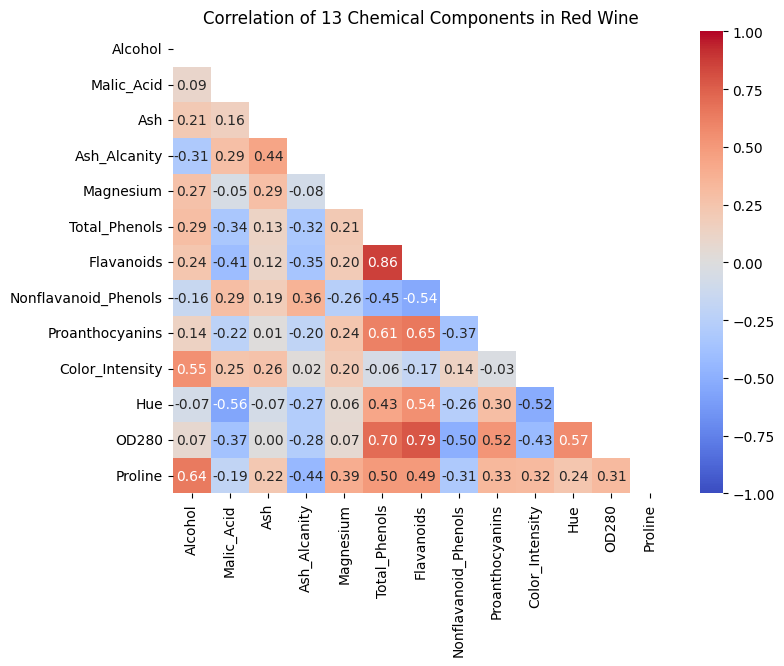

In [6]:
corr =  df.iloc[:,:13].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:13].corr(), cmap = 'coolwarm', annot = True, fmt = ".2f", mask = mask, vmax = 1, vmin = -1)

plt.title("Correlation of 13 Chemical Components in Red Wine")

### 繪製每個化學成分（變數）的盒鬚圖（Boxplot）
觀察每個變數的 scaling，作為是否標準化的參考<br>

<hr>

從下方左圖可以觀察出未標準化前各變數的全距差距大，並且Proline的數值比其他變數大許多，接著從下方右圖可以觀察到標準化過後的變數平均數都在0附近，並不會因為變異特別大而對PCA造成特別強烈影響。


In [17]:
from sklearn.preprocessing import StandardScaler

wine = np.array(df.iloc[:,:13])
components = df.columns[:13]

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(wine)
# Apply transform to dataset.
wine_stand = scaler.transform(wine)

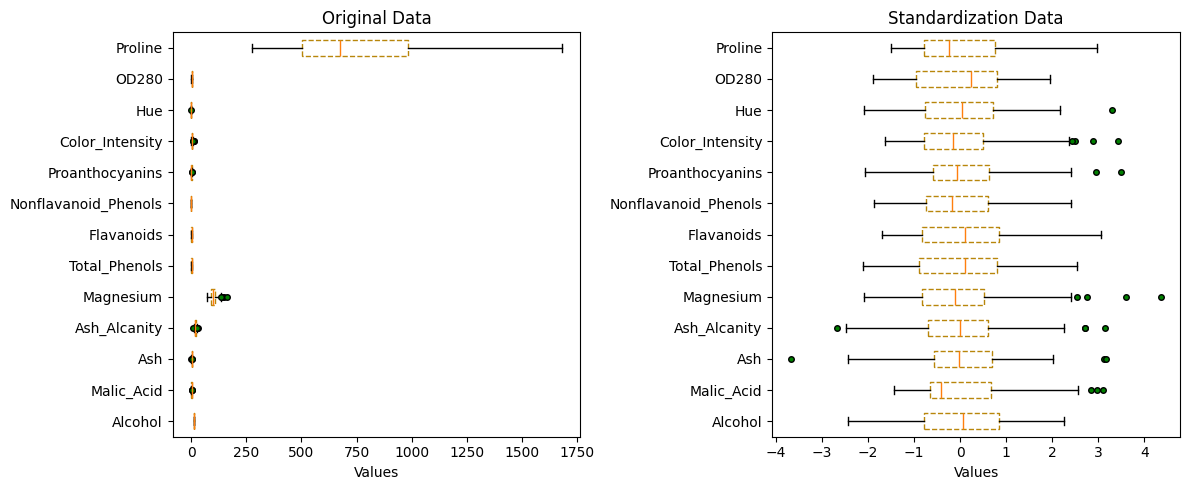

In [18]:

# 假設 wine 是你的數據，components 是對應的標籤
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 建立一個 1x2 佈局的畫布

# 設定箱形圖屬性
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')

# 繪製第一張圖（箱形圖）
axes[0].boxplot(wine, boxprops=boxprops, flierprops=flierprops, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Original Data')
axes[0].set_yticklabels(components)

axes[1].boxplot(wine_stand, boxprops=boxprops, flierprops=flierprops, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('Standardization Data')
axes[1].set_yticklabels(components)

plt.tight_layout()  # 調整間距，避免重疊
plt.show()

<a id="data1Q3"></a>
### 繪製特徵值由大而小的分布與 Scree Plot。
進行主成分分析，繪製特徵值由大而小的分布與 Scree Plot。<br>

<hr>

<font size=2>標準化的影響</font>

使用原始資料進行PCA，觀察到以下2點：
1. 從下方圖形可以發現，第1項成分就可以解釋 0.998 的原始變數，是不是受到數值大小的影響？
2. 進一步觀察第1項成分的特徵向量，參考 [第7題] 的第2個圖形，可以發現第1項成分基本上是由 Proline 所構成，也就是標準化前數值較大且變異較大的變數

由於Proline與其他變數的數值差異較大，會使PCA的主成分受到Proline的影響較大而忽略掉其他變數，因此在進行PCA之前要記得將變數標準化，讓各變數的尺度都一樣
<hr>

<font size=2>標準化後的特徵值</font>

觀察標準化後之資料進行PCA的特徵值，可以發現取到第1至7項成分就有接近9成的解釋能力，在此推薦可以取用7個成分。

In [19]:
from sklearn.decomposition import PCA
pca_nostand = PCA().fit(df.iloc[:,:13])

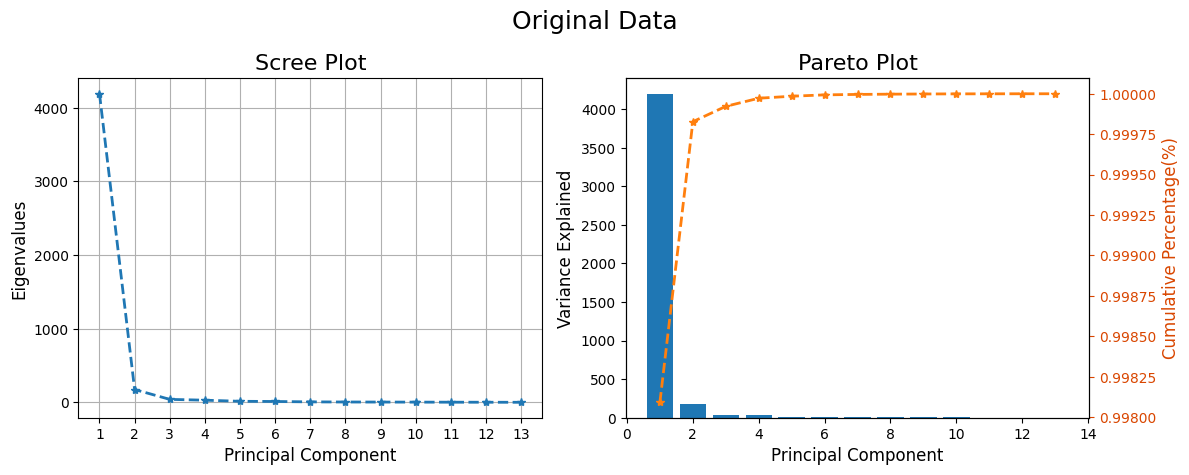

In [20]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 4.8))
x = np.arange(1, 1 + len(pca_nostand.singular_values_))
axes[0].plot(x, pca_nostand.singular_values_, marker = '*', lw = 2, linestyle='dashed')
axes[0].set_xticks(x)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca_nostand.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca_nostand.explained_variance_ratio_.cumsum(), marker='*', color='C1', lw=2, linestyle='dashed')
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Principal Component', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Original Data', fontsize=18)
plt.tight_layout()
plt.show()

In [21]:
# Apply transform to dataset.
wine_stand = scaler.transform(df.iloc[:,:13])

Sx = np.cov(wine_stand.T, bias=False)
w, v = np.linalg.eig(Sx)
idx = np.argsort(w)[::-1]
eigvalues = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvalues) @ eigvecs.T

/Users/jeweilin/Documents/Multivariate Analysis/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


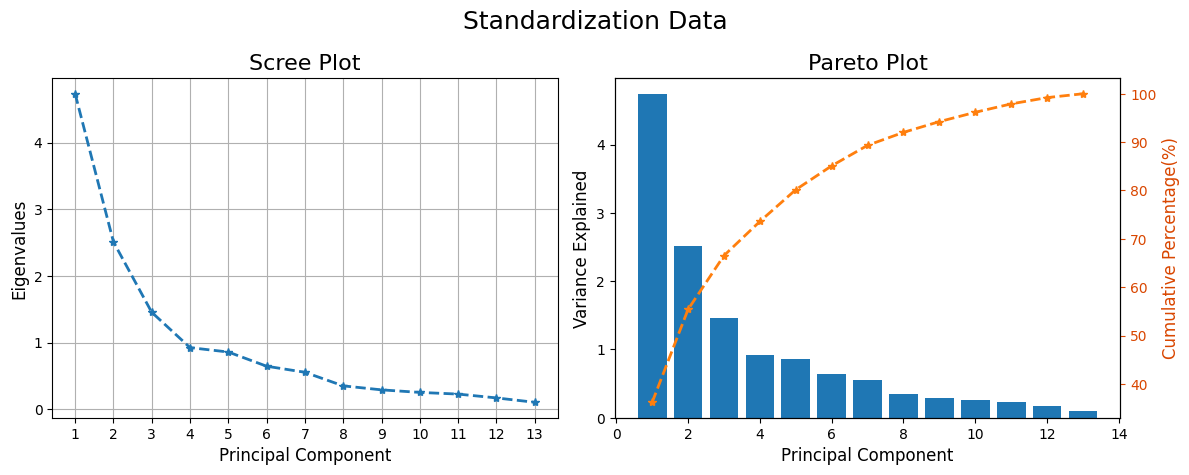

In [22]:
fig, axes = plt.subplots(ncols = 2, figsize = (12,4.8))
x = np.arange(1,1 + len(eigvalues))
axes[0].plot(x, eigvalues, marker = '*', lw = 2, linestyle = 'dashed')
axes[0].set_xticks(x)
axes[0].set_xlabel('Principal Component', fontsize = 12)
axes[0].set_ylabel('Eigenvalues', fontsize = 12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize = 16)

axes[1].bar(x, eigvalues)
ax2 = axes[1].twinx()
ax2.plot(x, eigvalues.cumsum() / eigvalues.sum() * 100, marker = '*', color = 'C1', lw = 2, linestyle = 'dashed')
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize = 12, color = "#D94600")
axes[1].set_xlabel('Principal Component', fontsize = 12)
axes[1].set_ylabel('Variance Explained', fontsize = 12)
axes[1].set_title('Pareto Plot', fontsize = 16)

fig.suptitle('Standardization Data', fontsize = 18)
plt.tight_layout()


### 利用PCA取得前兩項成分，繪製其散布圖
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？`資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。`

<hr>

下圖為前兩項成分的散步圖，右方是使用有經過標準化的資料，可以觀察出整體大概分成2~3群左右，左方是使用沒有標準化的資料，並沒有辦法直接看出有幾個群組。

再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。


根據每筆資料的標籤，塗上顏色後可以明顯發現，有標準化過只靠第1和2項成分就可以觀察出群組的趨勢，而原始資料則非常的混雜。

In [23]:

pca = PCA()
Z = pca.fit_transform(wine_stand)

Z_nostand = pca_nostand.transform(df.iloc[:,:13])

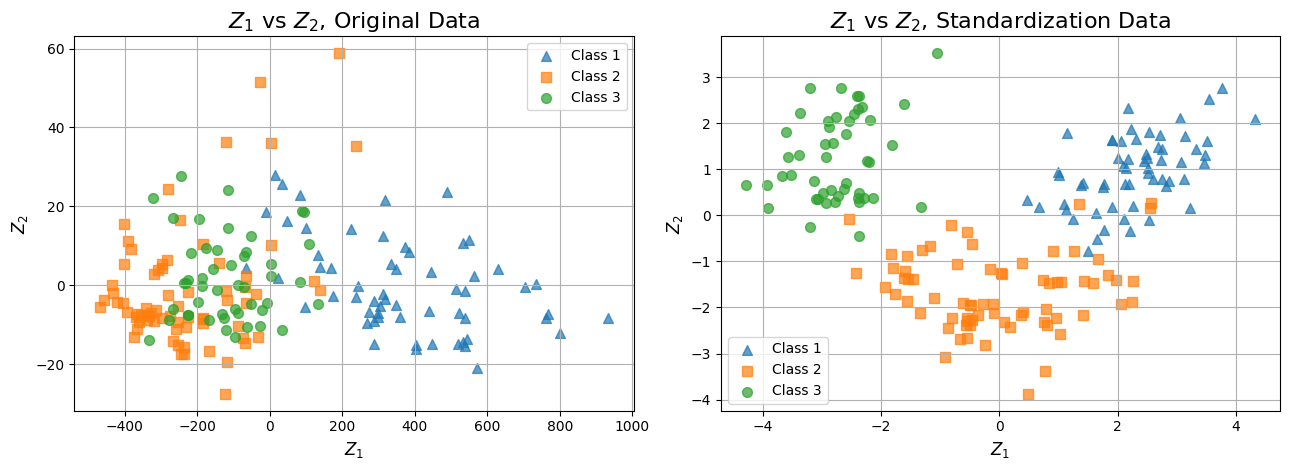

In [24]:
def plot_pca_scatter(data_list, titles, class_labels, figsize=(13, 4.8)):
    fig, axes = plt.subplots(ncols=len(data_list), figsize=figsize)

    # 設定顏色與標記
    #colors = {1: 'royalblue', 2: 'seagreen', 3: 'orangered'}
    markers = {1: '^', 2: 's', 3: 'o'} 

    for ax, data, title in zip(axes, data_list, titles):
        for class_val in [1, 2, 3]:  # 依照 class1~class3 繪圖
            mask = (class_labels == class_val)  # 取得該類別的索引
            ax.scatter(data[mask, 0], data[mask, 1], marker=markers[class_val], 
                       label=f'Class {class_val}', alpha=0.7, s =50)

        ax.set_xlabel(r'$Z_1$', fontsize=12)
        ax.set_ylabel(r'$Z_2$', fontsize=12)
        ax.grid(True)
        ax.set_title(title, fontsize=16)
        ax.legend()  # 顯示圖例

    plt.tight_layout()
    plt.show()

# 直接從 df 取得標籤，而不是隨機產生
class_labels = df['Customer_Segment'].to_numpy() 

plot_pca_scatter(
    [Z_nostand, Z], 
    [r'$Z_1$ vs $Z_2$, Original Data', r'$Z_1$ vs $Z_2$, Standardization Data'],
    class_labels
)


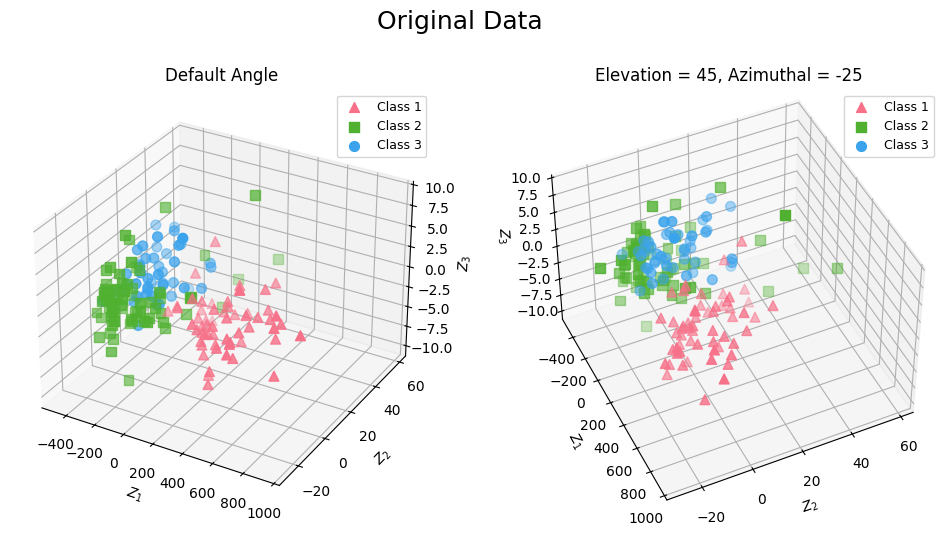

In [25]:

fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12,6))
markerlst = ['^', 's', 'o']
marker_size = 50
colors = sns.color_palette("husl", len(set(df['Customer_Segment']))) 

titles = ['Default Angle', 'Elevation = 45, Azimuthal = -25']
angles = [(None, None), (45, -25)]

for ax, title, (elev, azim) in zip(axes, titles, angles):
    for e, (group, color) in enumerate(zip(sorted(set(df['Customer_Segment'])), colors)):
        filt = df['Customer_Segment'] == group
        ax.scatter(Z_nostand[filt, 0], Z_nostand[filt, 1], Z_nostand[filt, 2], 
                   label=f'Class {group}', marker=markerlst[e], s=marker_size, color=color)
    
    ax.legend(fontsize=9)
    ax.set_xlabel(r'$Z_1$'); ax.set_ylabel(r'$Z_2$'); ax.set_zlabel(r'$Z_3$')
    ax.set_title(title)

    if elev is not None:
        ax.view_init(elev, azim)

fig.suptitle('Original Data', fontsize=18)
axes[1].zaxis.set_label_position('lower')  
axes[1].zaxis.set_ticks_position('lower') 

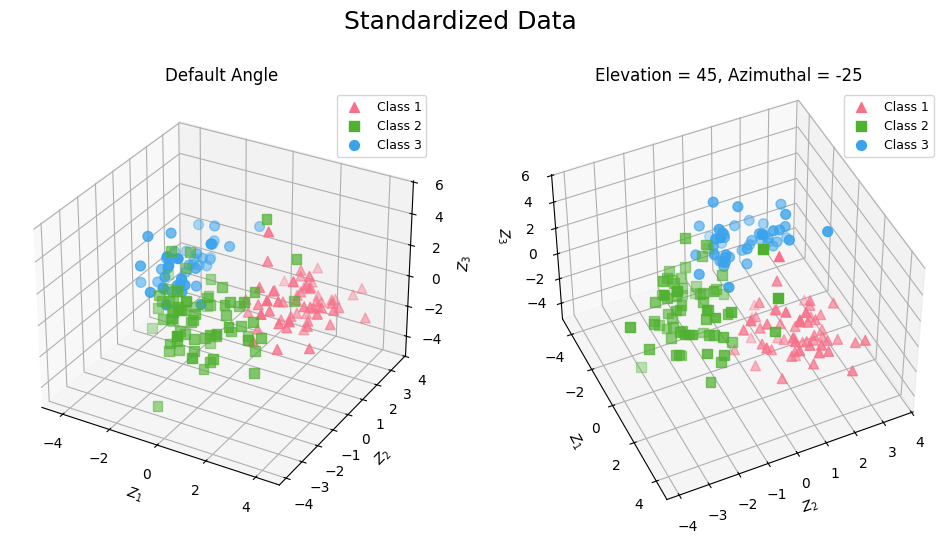

In [26]:

fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12,6))
markerlst = ['^', 's', 'o']
marker_size = 50
colors = sns.color_palette("husl", len(set(df['Customer_Segment'])))

titles = ['Default Angle', 'Elevation = 45, Azimuthal = -25']
angles = [(None, None), (45, -25)]

for ax, title, (elev, azim) in zip(axes, titles, angles):
    for e, (group, color) in enumerate(zip(sorted(set(df['Customer_Segment'])), colors)):
        filt = df['Customer_Segment'] == group
        ax.scatter(Z[filt, 0], Z[filt, 1], Z[filt, 2], 
                   label=f'Class {group}', marker = markerlst[e], s = marker_size, color = color)
    
    ax.legend(fontsize=9)
    ax.set_xlabel(r'$Z_1$'); ax.set_ylabel(r'$Z_2$'); ax.set_zlabel(r'$Z_3$')
    ax.set_title(title)

    if elev is not None:
        ax.view_init(elev, azim)

fig.suptitle('Standardized Data', fontsize=18)
axes[1].zaxis.set_label_position('lower')  
axes[1].zaxis.set_ticks_position('lower') 

<a id="data1Q7"></a>
### 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<hr>
下表為所有主成分的特徵向量，最後兩列分別為該成分的特徵值以及解釋原變數的比例，以下列舉出前 7 項成分中，重要的原變數，根據係數絕對值的大小排序：

- 第1項成分：Flavanoids、Total_Phenols、OD280、Proanthocyanins
- 第2項成分：Color_Intensity、Alcohol
- 第3項成分：Ash、Ash_Alcanity
- 第4項成分：Malic_Acid、Hue、Proanthocyanins、Magnesium
- 第5項成分：Magnesium、Nonflavanoid_Phenols
- 第6項成分：Malic_Acid、Proanthocyanins、Color_Intensity
- 第7項成分：Nonflavanoid_Phenols、Malic_Acid

接著觀察第一小題的[相關係數矩陣]，可以發現第一項成分重要的變數之間的相關係數也比較高，第二項成分重要的變數之間的相關係數也比較高，從此例了解到越有相關性的變數越有可能轉換成同一個主成分

In [27]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [28]:
cmap_o = plt.get_cmap('GnBu', 128)
newcolors = np.vstack((cmap_o(np.linspace(0.9, 0, 128)), cmap_o(np.linspace(0, 0.9, 128))))
newcmp = ListedColormap(newcolors, name='Purples_twoside')

In [30]:
comps = pca.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(df.iloc[:,:13].columns)
np_all = np.vstack((comps, pca.explained_variance_.reshape([1,-1]), pca.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)

styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Alcohol,0.144,0.484,-0.207,-0.018,-0.266,0.213,-0.056,0.396,-0.509,0.212,-0.226,-0.266,0.015
Malic_Acid,-0.245,0.225,0.089,0.537,0.035,0.537,0.420,0.066,0.075,-0.309,0.076,0.122,0.026
Ash,-0.002,0.316,0.626,-0.214,-0.143,0.154,-0.149,-0.170,0.308,-0.027,-0.499,-0.050,-0.141
Ash_Alcanity,-0.239,-0.011,0.612,0.061,0.066,-0.101,-0.287,0.428,-0.200,0.053,0.479,-0.056,0.092
Magnesium,0.142,0.300,0.131,-0.352,0.727,0.038,0.323,-0.156,-0.271,0.068,0.071,0.062,0.057
Total_Phenols,0.395,0.065,0.146,0.198,-0.149,-0.084,-0.028,-0.406,-0.286,-0.320,0.304,-0.304,-0.464
Flavanoids,0.423,-0.003,0.151,0.152,-0.109,-0.019,-0.061,-0.187,-0.050,-0.163,-0.026,-0.043,0.832
Nonflavanoid_Phenols,-0.298,0.029,0.170,-0.203,-0.501,-0.259,0.595,-0.233,-0.196,0.215,0.117,0.042,0.114
Proanthocyanins,0.313,0.039,0.149,0.399,0.137,-0.534,0.372,0.368,0.209,0.134,-0.237,-0.096,-0.117
Color_Intensity,-0.089,0.530,-0.137,0.066,-0.076,-0.419,-0.228,-0.034,-0.056,-0.291,0.032,0.604,-0.012
